# import and read

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.metrics import precision_score, recall_score, roc_auc_score

random_state = 42

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [2]:
data = pd.read_csv('training_set_features.csv', index_col=0)

targets = pd.read_csv('training_set_labels.csv', index_col=0)

data.shape, targets.shape

((26707, 35), (26707, 2))

# setup

In [3]:
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
data.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [5]:
data[data.dtypes[data.dtypes == 'object'].index].describe()

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [6]:
str_dummies = pd.get_dummies(data[data.dtypes[data.dtypes == 'object'].index], drop_first=True)

cats = ['h1n1_concern', 'h1n1_knowledge',
        'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
        'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
        'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
        'household_adults', 'household_children']

cat_dummies = pd.get_dummies(data[cats], drop_first=True)

new_data = pd.concat([data[(data.dtypes[data.dtypes != 'object'].index)].drop(cats, axis=1),
                      str_dummies, cat_dummies], axis=1)

new_data.shape

(26707, 93)

In [7]:
new_data.head()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,race_Hispanic,race_Other or Multiple,race_White,sex_Male,"income_poverty_> $75,000",...,employment_occupation_hodpvpew,employment_occupation_kldqjyjy,employment_occupation_mxkfnird,employment_occupation_oijqvulv,employment_occupation_pvmttkik,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv,h1n1_concern,h1n1_knowledge,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,0,0,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,0,0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0,1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0


# splitting

In [8]:
X_train, X_test, y_train, y_test = train_test_split(new_data, targets, test_size=0.2, random_state=random_state)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21365, 93), (5342, 93), (21365, 2), (5342, 2))

In [9]:
X_train.shape[0] - X_train.count()

behavioral_antiviral_meds                 59
behavioral_avoidance                     163
behavioral_face_mask                      14
behavioral_wash_hands                     36
behavioral_large_gatherings               72
behavioral_outside_home                   59
behavioral_touch_face                    102
doctor_recc_h1n1                        1736
doctor_recc_seasonal                    1736
chronic_med_condition                    771
child_under_6_months                     655
health_worker                            643
health_insurance                        9858
age_group_35 - 44 Years                    0
age_group_45 - 54 Years                    0
age_group_55 - 64 Years                    0
age_group_65+ Years                        0
education_< 12 Years                       0
education_College Graduate                 0
education_Some College                     0
race_Hispanic                              0
race_Other or Multiple                     0
race_White

In [10]:
y_train.describe()

,h1n1_vaccine,seasonal_vaccine
count,21365.000000,21365.000000
mean,0.212684,0.467306
std,0.409216,0.498942
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [11]:
y_train.loc[X_train[X_train['health_insurance'].isnull()].index].describe()

,h1n1_vaccine,seasonal_vaccine
count,9858.00000,9858.000000
mean,0.11341,0.426861
std,0.31711,0.494647
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,0.000000
75%,0.00000,1.000000
max,1.00000,1.000000


# * transformation

In [12]:
X_train['health_insurance_null'] = [1 if np.isnan(i) else 0 for i in X_train['health_insurance']]
X_train = X_train.fillna(0)

X_test['health_insurance_null'] = [1 if np.isnan(i) else 0 for i in X_test['health_insurance']]
X_test = X_test.fillna(0)

<ipython-input-12-414c37b9e5fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['health_insurance_null'] = [1 if np.isnan(i) else 0 for i in X_train['health_insurance']]
<ipython-input-12-414c37b9e5fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['health_insurance_null'] = [1 if np.isnan(i) else 0 for i in X_test['health_insurance']]


# default model

In [13]:
lr = LogisticRegression(random_state=random_state, max_iter=1e4)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state=random_state)

In [14]:
def brute_force(model, target):
    
    model.fit(X_train, y_train[target])
    
    pred = model.predict(X_test)
    
    print('-'*20)
    print(f'results on {target} with {model}')
    print('-'*20)
    print(f'recall:  {recall_score(y_test[target], pred)}')
    print('-'*20)
    print(f'precision:  {precision_score(y_test[target], pred)}')
    print('-'*20)
    print(f'roc auc:  {roc_auc_score(y_test[target], pred)}')
    print()
    print()

In [15]:
for target in y_train.columns:
    for model in [lr, knn, rfc]:
        brute_force(model, target)

--------------------
results on h1n1_vaccine with LogisticRegression(max_iter=10000.0, random_state=42)
--------------------
recall:  0.4690265486725664
--------------------
precision:  0.7123655913978495
--------------------
roc auc:  0.7091096655993411


--------------------
results on h1n1_vaccine with KNeighborsClassifier()
--------------------
recall:  0.384070796460177
--------------------
precision:  0.6280752532561505
--------------------
roc auc:  0.6615273260553497


--------------------
results on h1n1_vaccine with RandomForestClassifier(random_state=42)
--------------------
recall:  0.4345132743362832
--------------------
precision:  0.760061919504644
--------------------
roc auc:  0.6988568271016649


--------------------
results on seasonal_vaccine with LogisticRegression(max_iter=10000.0, random_state=42)
--------------------
recall:  0.7429620563035496
--------------------
precision:  0.7742346938775511
--------------------
roc auc:  0.7796442934578973


---------------

# default lightgbm

In [16]:
lgbm = lgb.LGBMClassifier(objective='binary', random_state=random_state)

# high maintenance models are high maintenance
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [17]:
for target in y_train.columns:
    brute_force(lgbm, target)

--------------------
results on h1n1_vaccine with LGBMClassifier(objective='binary', random_state=42)
--------------------
recall:  0.5132743362831859
--------------------
precision:  0.7187112763320942
--------------------
roc auc:  0.7296903495281075


--------------------
results on seasonal_vaccine with LGBMClassifier(objective='binary', random_state=42)
--------------------
recall:  0.7707058343533252
--------------------
precision:  0.7792904290429042
--------------------
roc auc:  0.7928243803381984




# parameter tuning lr and rfc

- knn is out, keeping in lr and rfc for nostalgia about clunky old models

In [18]:
lr = LogisticRegression(random_state=random_state, max_iter=1e4)

lr_search = dict(C=uniform(loc=0, scale=3),
                 class_weight=[None, {0:1, 1:1}, {0:1, 1:2}, {0:1, 1:4}])

clf = RandomizedSearchCV(lr, lr_search, random_state=random_state, scoring='roc_auc')

for target in y_train.columns:
    search = clf.fit(X_train, y_train[target])
    print(f'{target}')
    print(search.best_params_)

h1n1_vaccine
{'C': 1.1236203565420875, 'class_weight': None}
seasonal_vaccine
{'C': 1.1236203565420875, 'class_weight': None}


In [19]:
# no changes

lr = LogisticRegression(random_state=random_state, max_iter=1e4, C=1.12362)

for target in y_train.columns:
    brute_force(lr, target)

--------------------
results on h1n1_vaccine with LogisticRegression(C=1.12362, max_iter=10000.0, random_state=42)
--------------------
recall:  0.46991150442477875
--------------------
precision:  0.7127516778523489
--------------------
roc auc:  0.7095521434754473


--------------------
results on seasonal_vaccine with LogisticRegression(C=1.12362, max_iter=10000.0, random_state=42)
--------------------
recall:  0.7429620563035496
--------------------
precision:  0.7742346938775511
--------------------
roc auc:  0.7796442934578973




In [20]:
rfc = RandomForestClassifier(random_state=random_state)

rfc_search = dict(n_estimators=[10, 50, 100],
                  class_weight=[None, {0:1, 1:1}, {0:1, 1:2}, {0:1, 1:4}],
                  min_samples_split=[2, 4, 8, 16],
                  max_depth=[2, 3, 4, None])

clf = RandomizedSearchCV(rfc, rfc_search, random_state=random_state, scoring='roc_auc')

for target in y_train.columns:
    search = clf.fit(X_train, y_train[target])
    print(f'{target}')
    print(search.best_params_)

h1n1_vaccine
{'n_estimators': 100, 'min_samples_split': 16, 'max_depth': None, 'class_weight': {0: 1, 1: 2}}
seasonal_vaccine
{'n_estimators': 100, 'min_samples_split': 16, 'max_depth': None, 'class_weight': {0: 1, 1: 2}}


In [21]:
# much better recall for both, roc up on h1n1 down on seasonal

rfc = RandomForestClassifier(random_state=random_state, min_samples_split=16, class_weight={0: 1, 1: 2})

for target in y_train.columns:
    brute_force(rfc, target)

--------------------
results on h1n1_vaccine with RandomForestClassifier(class_weight={0: 1, 1: 2}, min_samples_split=16,
                       random_state=42)
--------------------
recall:  0.5389380530973451
--------------------
precision:  0.6920454545454545
--------------------
roc auc:  0.7372990360453489


--------------------
results on seasonal_vaccine with RandomForestClassifier(class_weight={0: 1, 1: 2}, min_samples_split=16,
                       random_state=42)
--------------------
recall:  0.8412892696858425
--------------------
precision:  0.7120165745856354
--------------------
roc auc:  0.7764038876966051




# lgb check

In [22]:
lgbm = lgb.LGBMClassifier(objective='binary', random_state=random_state)

for target in y_train.columns:
    lgbm.fit(X_train, y_train[target])
    pred_in = lgbm.predict(X_train)
    in_ = roc_auc_score(y_train[target], pred_in)
    pred_out = lgbm.predict(X_test)
    out_ = roc_auc_score(y_test[target], pred_out)
    print('-'*20)
    print(f'results on {target}:')
    print(f'in sample roc auc:  {in_}')
    print(f'out of sample roc auc:  {out_}')
    print(f'overfitting degree:  {round(in_/out_, 2)}')

--------------------
results on h1n1_vaccine:
in sample roc auc:  0.7682358390354611
out of sample roc auc:  0.7296903495281075
overfitting degree:  1.05
--------------------
results on seasonal_vaccine:
in sample roc auc:  0.8173524216375584
out of sample roc auc:  0.7928243803381984
overfitting degree:  1.03


In [23]:
# lets give it a shot without oneshot encoding, using lgb's data setup

lgb_Xtrain, lgb_Xtest, lgb_ytrain, lgb_ytest = data.iloc[X_train.index], data.iloc[X_test.index],\
                                                targets.iloc[y_train.index], targets.iloc[y_test.index]

categorical = cats + list(data.dtypes[data.dtypes == 'object'].index)

for c in categorical:
    lgb_Xtrain[c] = lgb_Xtrain[c].astype('category')
    lgb_Xtest[c] = lgb_Xtest[c].astype('category')

for target in y_train.columns:
    # data setup
    lgb_train = lgb.Dataset(lgb_Xtrain, lgb_ytrain[target])
    # params and fitting
    params = dict(objective='binary', random_state=random_state)
    fit = lgb.train(params, lgb_train)
    # predict
    pred_in = fit.predict(lgb_Xtrain)
    in_ = roc_auc_score(lgb_ytrain[target], pred_in)
    pred_out = fit.predict(lgb_Xtest)
    out_ = roc_auc_score(lgb_ytest[target], pred_out)
    print('-'*20)
    print(f'results on {target}:')
    print(f'in sample roc auc:  {in_}')
    print(f'out of sample roc auc:  {out_}')
    print(f'overfitting degree:  {round(in_/out_, 2)}')

<ipython-input-23-d94a17e92f8b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lgb_Xtrain[c] = lgb_Xtrain[c].astype('category')
<ipython-input-23-d94a17e92f8b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lgb_Xtest[c] = lgb_Xtest[c].astype('category')


[LightGBM] [Info] Number of positive: 4544, number of negative: 16821
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 21365, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212684 -> initscore=-1.308820
[LightGBM] [Info] Start training from score -1.308820
--------------------
results on h1n1_vaccine:
in sample roc auc:  0.9281193428779082
out of sample roc auc:  0.8700373563942887
overfitting degree:  1.07
[LightGBM] [Info] Number of positive: 9984, number of negative: 11381
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003223 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_

In [24]:
# much better, quite good...
# looking at leaves vs depth
# this model is super talkative

results = {i: [] for i in y_train.columns}

for target in y_train.columns:
    for depth in range(2, 5): # a to b-1
        for leaves in range(3, 2**depth): # c to d-1
            # data setup
            lgb_train = lgb.Dataset(lgb_Xtrain, lgb_ytrain[target])
            # params and fitting and making it quiet
            params = dict(objective='binary', random_state=random_state, max_depth=depth, num_leaves=leaves)
            fit = lgb.train(params, lgb_train)
            # predict
            pred_in = fit.predict(lgb_Xtrain)
            in_ = roc_auc_score(lgb_ytrain[target], pred_in)
            pred_out = fit.predict(lgb_Xtest)
            out_ = roc_auc_score(lgb_ytest[target], pred_out) 
            results[target].append((depth, leaves, out_, in_/out_))

[LightGBM] [Info] Number of positive: 4544, number of negative: 16821
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 21365, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212684 -> initscore=-1.308820
[LightGBM] [Info] Start training from score -1.308820
[LightGBM] [Info] Number of positive: 4544, number of negative: 16821
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 21365, number of used features: 35
[LightGBM] [Info

In [25]:
# performance
results

{'h1n1_vaccine': [(2, 3, 0.8670137575742296, 0.9988752420612844),
  (3, 3, 0.8670137575742296, 0.9988752420612844),
  (3, 4, 0.8683729168242442, 1.0020373128789832),
  (3, 5, 0.8701011227928632, 1.0045326588194439),
  (3, 6, 0.8703566085940717, 1.0076570682534844),
  (3, 7, 0.8715399112523008, 1.0097313675597888),
  (4, 3, 0.8670137575742296, 0.9988752420612844),
  (4, 4, 0.8683729168242442, 1.0020373128789832),
  (4, 5, 0.870602219532898, 1.0045439408486891),
  (4, 6, 0.8709013018010068, 1.0080422108072116),
  (4, 7, 0.8718473976586072, 1.0098456796313382),
  (4, 8, 0.8725012396103842, 1.0119175004224388),
  (4, 9, 0.8728548437250502, 1.0147429000809223),
  (4, 10, 0.8717955021052366, 1.0173440957964248),
  (4, 11, 0.8721165401843869, 1.0197844306716037),
  (4, 12, 0.8724224508147812, 1.0220929063280941),
  (4, 13, 0.8709998403213742, 1.0256243913242427),
  (4, 14, 0.8723644622612176, 1.0255652031295404),
  (4, 15, 0.8725281328526167, 1.026184070052962)],
 'seasonal_vaccine': [(2, 3, 

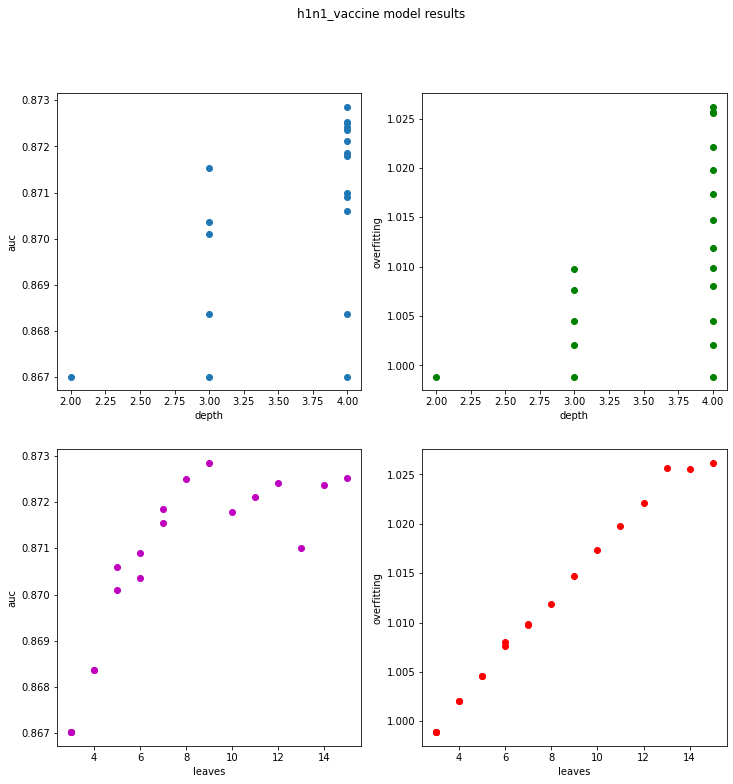

In [26]:
# h1n1 viz
# depth -> more deep, potentially more accurate & definitely more overfit
# leaves -> diminishing returns on auc, steady increase in overfitting

x1, x2, y1, y2 = zip(*results['h1n1_vaccine'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('h1n1_vaccine model results')
ax1.scatter(x1, y1)
ax1.set_xlabel('depth')
ax1.set_ylabel('auc')
ax2.scatter(x1, y2, c='g')
ax2.set_xlabel('depth')
ax2.set_ylabel('overfitting')
ax3.scatter(x2, y1, c='m')
ax3.set_xlabel('leaves')
ax3.set_ylabel('auc')
ax4.scatter(x2, y2, c='r')
ax4.set_xlabel('leaves')
ax4.set_ylabel('overfitting');

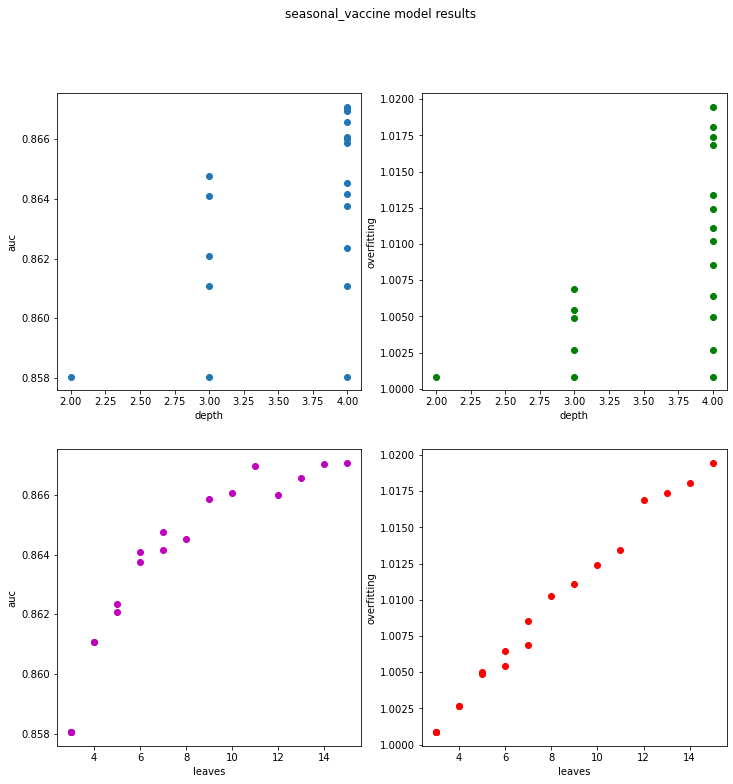

In [27]:
# seasonal viz
# same conclusions

x1, x2, y1, y2 = zip(*results['seasonal_vaccine'])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('seasonal_vaccine model results')
ax1.scatter(x1, y1)
ax1.set_xlabel('depth')
ax1.set_ylabel('auc')
ax2.scatter(x1, y2, c='g')
ax2.set_xlabel('depth')
ax2.set_ylabel('overfitting')
ax3.scatter(x2, y1, c='m')
ax3.set_xlabel('leaves')
ax3.set_ylabel('auc')
ax4.scatter(x2, y2, c='r')
ax4.set_xlabel('leaves')
ax4.set_ylabel('overfitting');